# Poprawa współczynników filtru 
---
<p align="center">
    <img src="./doc/img/FIR.png", width = "500px">
</p>

## Wyznaczanie parametrów filtru - metoda okna

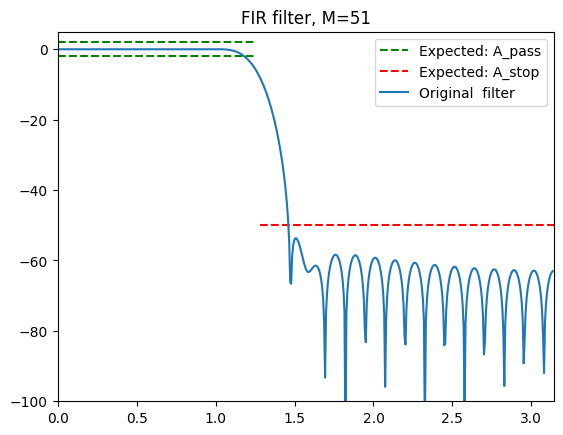

Initial value cost function: 38.87065674182085 


In [33]:
from filter import filter_utils
from scipy import signal
import numpy as np

# Parametry filtru
filter = {
    'N_fft':   512,
    'm_order': 51,
    'fs':      48e3,
    'f_pass':  9.6e3,
    'tr_band': 0.2e3,
    'd1_db':   2,
    'd2_db':   -50,
}

# Normalize filter
filter_n = filter_utils.normalize_filter (filter)

# Współczynniki filtru metoda okienkowa
coef     = signal.firwin(filter['m_order'], filter['f_pass'], fs=filter['fs'], window='hamming')
f, f_res = signal.freqz(coef, worN=filter['N_fft'])

# Wyświetlenie parametrów filtru
filter_utils.display_LP_filter(f[np.newaxis,:], f_res[np.newaxis,:], filter_n)

# Domyślna wartość funkcji kosztu
cost_val = filter_utils.cost_LP_filter(abs(f_res), filter_utils.db_to_linear(filter_n['d1_db'])-1, filter_utils.db_to_linear(filter_n['d2_db']), filter_n['f_pass'], filter_n['tr_band'])
print("Initial value cost function: {} ".format(cost_val))

## Poprawa współczynników filtru metoda RVNS

In [21]:
from filter import filter_utils
from filter import rvns_filter

rvnsc_param = {
    'k_prime': 500,
    'k_bis':   500,
}

cost_best, coef_best = rvns_filter.rvns_con(coef, filter_n, rvnsc_param['k_prime'], rvnsc_param['k_bis'])

## Uzyskane rezultaty 

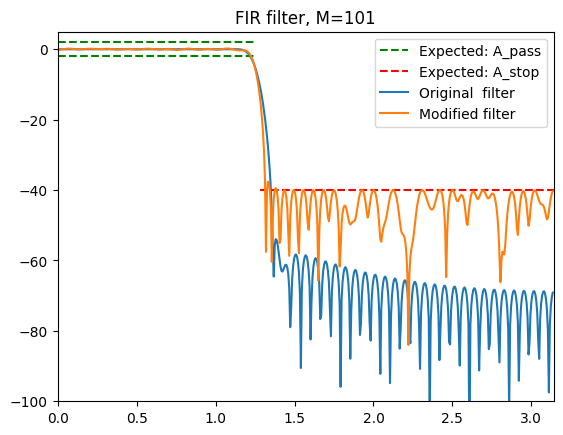

In [22]:
from filter import filter_utils
f_b, f_res_b = signal.freqz(coef_best, worN=filter_n['N_fft'])
filter_utils.display_LP_filter(np.append(f[np.newaxis,:], f_b[np.newaxis,:], axis=0), 
                                np.append(f_res[np.newaxis,:], f_res_b[np.newaxis,:], axis=0 ), filter_n)

In [28]:
import matplotlib.pyplot as plt
def display_LP_filtera(f, f_response, filter_params, labels):
    """_summary_

    Args:
        f (_type_): _description_
        f_response (_type_): _description_
        filter_params (_type_): _description_
    """

    d1 = filter_params["d1_db"]
    d2 = filter_params["d2_db"]
    f_pass = filter_params["f_pass"]
    tr_band = filter_params["tr_band"]
    m_order = filter_params["m_order"]

    # Draw limits
    plt.hlines(-d1, 0, f_pass, linestyles="dashed", colors="g")
    plt.hlines(+d1, 0, f_pass, linestyles="dashed", colors="g")
    plt.hlines(d2, f_pass + tr_band, np.pi, linestyles="dashed", colors="r")

    # Draw filter response
    for i in range(len(f_response)):
        plt.plot(f, 20 * np.log10(abs(f_response[i])), label=labels[i])

    plt.xlim([0, np.pi])
    plt.ylim([-150, 5])
    plt.legend(loc = 'lower left')
    plt.title("FIR filter, M={}".format(m_order))
    plt.show()

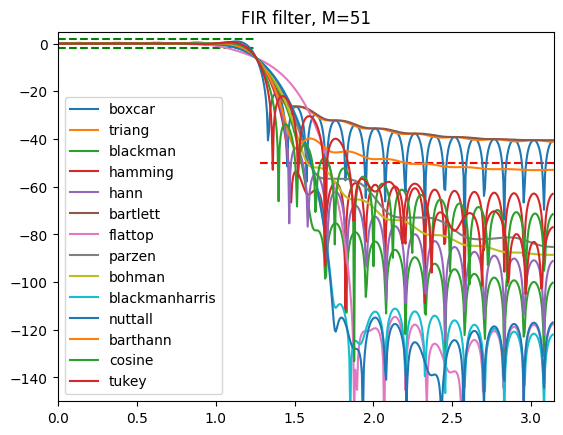

In [34]:
windows = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 'flattop', 'parzen', 'bohman', 'blackmanharris', 'nuttall', 'barthann', 'cosine', 'tukey']

f_res_a = []
# Współczynniki filtru metoda okienkowa
for i, w in enumerate(windows):
    coef = signal.firwin(filter['m_order'], filter['f_pass'], fs=filter['fs'], window=w)
    f, f_res = signal.freqz(coef, worN=filter['N_fft'])
    f_res_a.append(f_res)
    
display_LP_filtera(f, f_res_a, filter_n, windows)

In [40]:
# check cost function
cost_val = []
for res in f_res_a:
    cost_val.append(filter_utils.cost_LP_filter(abs(res), filter_utils.db_to_linear(filter_n['d1_db'])-1, filter_utils.db_to_linear(filter_n['d2_db']), filter_n['f_pass'], filter_n['tr_band']))

np.random.permutation(cost_val).reshape((len(cost_val)//2, 2))


array([[ 42.70624734,  87.34980114],
       [ 69.21761033,  83.54816901],
       [ 56.46877609,  43.75219223],
       [115.08008513,  64.71066138],
       [ 38.87065674,  47.02599051],
       [ 37.2407355 ,  29.71080517],
       [ 59.61089778,  70.28920358]])

In [24]:
c = np.random.randint(0,2,size=(51))
np.logical_not(c) * np.random.randint(25,32,size=(51))


array([ 0,  0,  0, 28, 30,  0,  0, 30, 25, 30, 30,  0, 26, 26, 29, 25, 30,
        0,  0, 28, 25, 26, 28,  0,  0, 30,  0, 28, 26,  0, 27,  0,  0, 27,
       30,  0, 25, 26,  0, 25, 30,  0, 29,  0,  0, 28,  0,  0,  0, 27,  0])

In [43]:
# Implementacja genetyka

n_parents = 14
# Wartości początkowe stosowanie jako rodzic
window_method = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 'flattop',
                 'parzen', 'bohman', 'blackmanharris', 'nuttall', 'barthann', 'cosine', 'tukey']


f_res = np.zeros((n_parents, filter['N_fft']))

# Współczynniki filtru metoda okienkowa
for i, w in enumerate(windows):
    coef = signal.firwin(filter['m_order'], filter['f_pass'], fs=filter['fs'], window=w)
    f, f_res_complex = signal.freqz(coef, worN=filter['N_fft'])
    f_res[i,:] = np.real(f_res_complex)

# Permutacja 
np.random.permutation(np.arange(0,))